# Play Store Apps Analysis

**Questinos To Answer:**
1. What is the most expensive app in the store.
2. Which Genre has more apps.
3. What is the average size of free & paid apps.
4. What is the top expensive apps that have rate 5.
5. How many apps that has more than 50k reviews.
6. What is the average price of the apps for each genre with each installs numbers.
7. How many apps have ratting > 4.7 and what is their average price.
8. How much google earned from the 5,000,000+ installed apps.
9. What is the max and min size of free & paid apps.
10. Is there a correlation between Ratting, Reviews, Size with the price of the app.
11. How many apps for each type of each content reading.
12. How many apps that can work on android version 4 or more.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':[9, 9]}, font_scale = 1.2)

## Read dataset

In [2]:
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Notes:**
* From out bussness point of view these columns must be numeric:
  1. Ratting  
  2. Reviews  
  3. Size  
  4. Price  

### Data Cleaning
**Fix numerical columns**

**Fix Reviews**

In [4]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

**Note:** From just looking we see that all data is numeric.

In [5]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


**Note:** Review is done.

**Fix Size**

In [7]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Note:**
If we saw the size column data we will found at most data varies from:
1. MegaByte
2. KiloByte
3. 1000+
4. Varies from device

So we will create new columns each size is in mega, if kilo byte we will change it to mega, 1000+ we will make it 1 mega, and 
varies from device will set it to Nan

In [8]:
def fix_size(size):
    try:
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024
        elif size == '1,000+':
            return float(1)
        else:
            return np.nan
    except:
        return np.nan

df['Size'] = df['Size'].apply(fix_size)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


**Note:** Size is done

**Fix Price**

In [10]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

**Note:**
If we saw the price column data we will found at most data varies from:
1. 0
2. Price with dollar sign
3. Every one

So we will create new columns each price is in dollar, if 0 or every one we will set it to 0, else we remove dollar sign

In [11]:
def fix_price(price):
    try:
        if price == '0' or price == 'Everyone':
            return float(0)
        elif price.startswith('$'):
            return float(price[1:])
        else:
            return np.nan
    except:
        return np.nan
df['Price'] = df['Price'].apply(fix_price)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


**Note:** Price is done

We now done fix numerical columns

### Apply univarant analysis (Numerical Columns)

In [13]:
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


**Note:** 
* From numbers all columns are good distributed except ratting.
* Ratting max number is 19, but we suppose to have max rate = 5, so we need to analyze it.

In [14]:
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Note**: We have only one row > 5, and this row is very bad so will remove it from our dataset

In [15]:
idx = df[df['Rating'] > 5].index
idx

Int64Index([10472], dtype='int64')

In [16]:
df.drop(idx, axis = 0, inplace=True)

In [17]:
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


**Note:** No weired data now

### Apply univarant analysis (Categorical Columns)

In [21]:
df['Category'] = df['Category'].apply(lambda cat : cat.title())

In [22]:
df['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)

In [23]:
df['Category'].value_counts()

Family                 1972
Game                   1144
Tools                   843
Medical                 463
Business                460
Productivity            424
Personalization         392
Communication           387
Sports                  384
Lifestyle               382
Finance                 366
Health_And_Fitness      341
Photography             335
Social                  295
News_And_Magazines      283
Shopping                260
Travel_And_Local        258
Dating                  234
Books_And_Reference     231
Video_Players           175
Education               156
Entertainment           149
Maps_And_Navigation     137
Food_And_Drink          127
House_And_Home           88
Auto_And_Vehicles        85
Libraries_And_Demo       85
Weather                  82
Art_And_Design           65
Events                   64
Parenting                60
Comics                   60
Beauty                   53
Name: Category, dtype: int64

**Note:** Nothing weried on category column

In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

**Note:** Nothing weried also in installs

In [28]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

**Note:** We will handle missing values later.

In [30]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [31]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

 **Note:** Nothing to do, all good.

In [33]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [34]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [35]:
del df['Genres']
del df['Last Updated']
del df['Current Ver']
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device


## Data Analysis
**Check for missing values**

In [36]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Android Ver          2
dtype: int64

In [38]:
df.isna().mean() * 100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Android Ver        0.018450
dtype: float64

**Handle Android Ver and Type (Categorical columns) by replacing nan values with the most frequent value**

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['Android Ver'] = imputer.fit_transform(df[['Android Ver']])
df['Type'] = imputer.fit_transform(df[['Type']])

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Android Ver       0
dtype: int64

**Handle Rating and Reviews with knnimputer**

In [42]:
from sklearn.impute import KNNImputer

Knnimputer = KNNImputer()

df['Rating'] = Knnimputer.fit_transform(df[['Rating']])
df['Size'] = Knnimputer.fit_transform(df[['Size']])

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Android Ver       0
dtype: int64

**Note:** All missing data is handled correctly

**Check outliers**

In [47]:
def check_outlier(df, col):
    plt.figure()
    sns.boxplot(x = col, data=df)
    sns.stripplot(x = col, data=df, color='#0000')

In [48]:
from datasist.structdata import get_num_feats, detect_outliers
numeric_columns = get_num_feats(df)
numeric_columns

['Rating', 'Reviews', 'Size', 'Price']

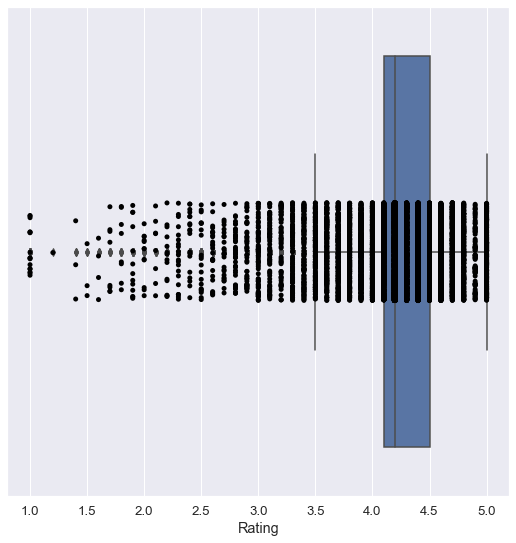

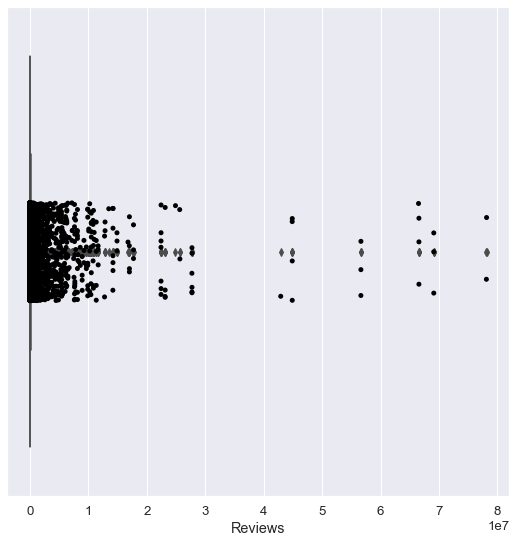

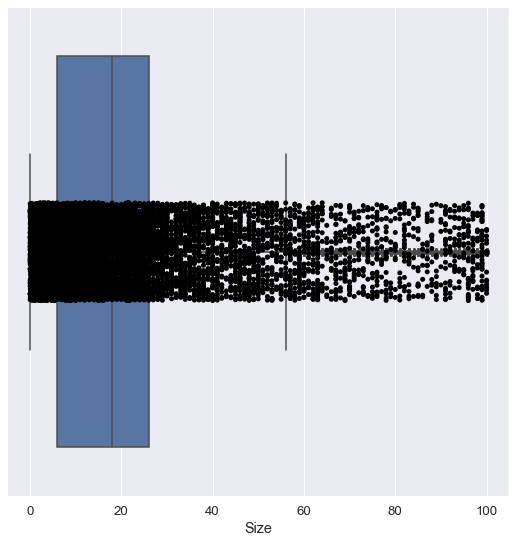

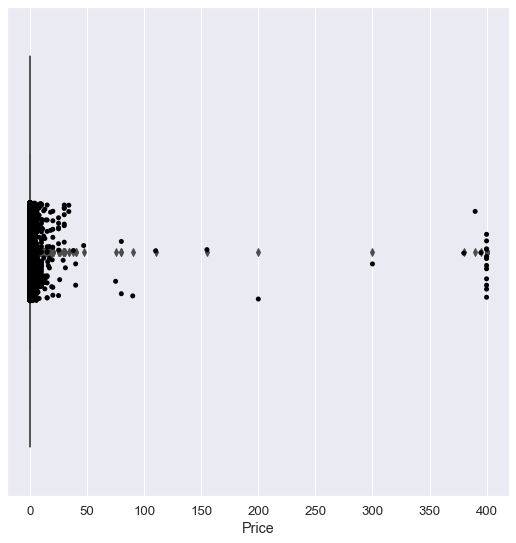

In [128]:
for col in numeric_columns:
    check_outlier(df, col)

**Note:** 
* These outliers mostly not errors cuz this is busness values, so we will not remove it.
* In other somecases u can take outliers rows in another dataset then analysis it, and then analyze clean data alone.

**1. What is the most expensive app in the store.**

In [51]:
df[df['Price'] == df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,4.1 and up


**2. Which Genre has more apps.**

In [78]:
pd.pivot_table(data = df, index = 'Category', columns = 'Type', values = 'Rating', aggfunc='count')

Type,Free,Paid
Category,,
Art_And_Design,62.0,3.0
Auto_And_Vehicles,82.0,3.0
Beauty,53.0,NaN
Books_And_Reference,203.0,28.0
Business,446.0,14.0
Comics,60.0,NaN
Communication,360.0,27.0
Dating,227.0,7.0
Education,152.0,4.0


<AxesSubplot:xlabel='count', ylabel='Category'>

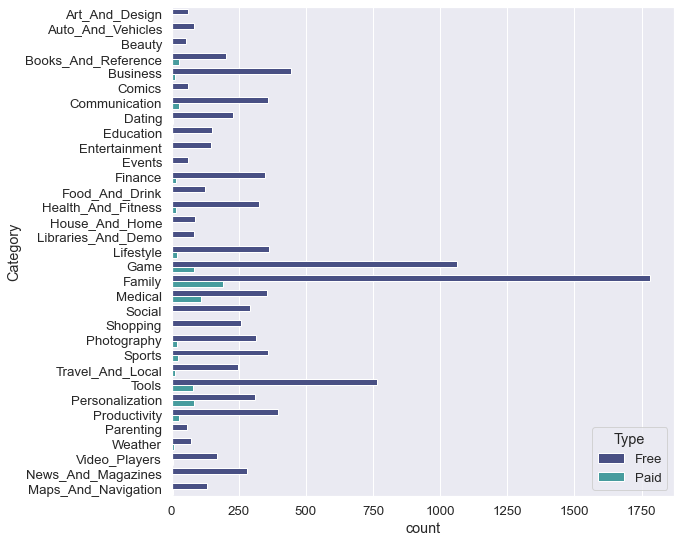

In [65]:
sns.countplot(y='Category', data = df, palette='mako', hue='Type')

**Notes:** 
* U can from these numbers see that the most frequent apps in category family, specific much more in free than paid. 
* and the lowest from beauty, specific all is free apps no paid apps.

**3. What is the average size of free & paid apps.**

In [61]:
df.groupby('Type')['Size'].mean()

Type
Free    21.675505
Paid    19.516453
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

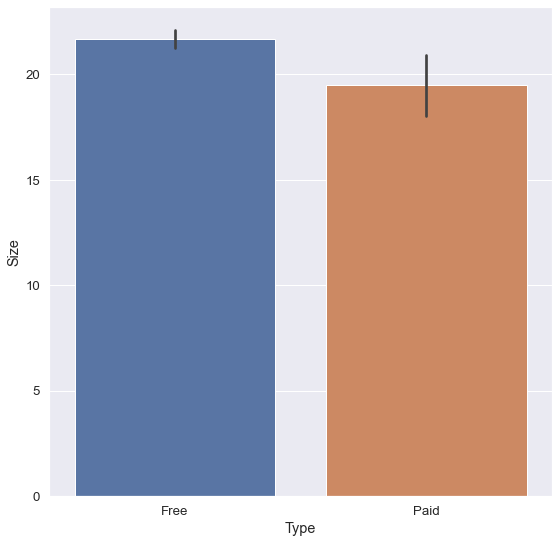

In [90]:
sns.barplot(x = 'Type', y = 'Size', data = df)

**Note:** We can notice the free apps is more large than paid (Sizes in Mega).

**4. What is the top expensive apps that have rate 5.**

In [85]:
df[df['Rating'] == df['Rating'].max()].sort_values(by = 'Price', ascending = False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
5489,AP Art History Flashcards,Family,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,4.0 and up
7477,USMLE Step 2 CK Flashcards,Family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,2.2 and up
5246,Hey AJ! It's Bedtime!,Family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,2.3 and up
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,4.1 and up
5482,meStudying: AP English Lit,Family,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,2.0.1 and up


**Note:** As we saw later the family category is the rich of all in apps, so it's make sense that the most expensive apps from 
this category.

**5. How many apps that has more than 50k reviews.**

In [91]:
df[df['Reviews'] > 50000].sort_values(by = 'Reviews', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
2544,Facebook,Social,4.1,78158306.0,21.516165,"1,000,000,000+",Free,0.0,Teen,Varies with device
3943,Facebook,Social,4.1,78128208.0,21.516165,"1,000,000,000+",Free,0.0,Teen,Varies with device
336,WhatsApp Messenger,Communication,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,Varies with device
381,WhatsApp Messenger,Communication,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,Varies with device
3904,WhatsApp Messenger,Communication,4.4,69109672.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,Varies with device
...,...,...,...,...,...,...,...,...,...,...
3046,Fantasy Football,Sports,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,5.0 and up
3098,Fantasy Football,Sports,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,5.0 and up
8294,Bokeh (Background defocus),Photography,4.0,50109.0,21.516165,"10,000,000+",Free,0.0,Everyone,Varies with device
9677,Masha and The Bear Jam Day Match 3 games for kids,Family,4.6,50060.0,98.000000,"1,000,000+",Free,0.0,Everyone,4.1 and up


**Note:** Facebook the most app that have reviews and that makes sense.

**6. What is the average price of the apps for each genre with each installs numbers.**

In [92]:
pd.pivot_table(data = df, index = 'Category', columns = 'Installs', values = 'Price', aggfunc=np.mean)

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
Art_And_Design,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
Auto_And_Vehicles,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
Beauty,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
Books_And_Reference,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
Business,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
Comics,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
Communication,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
Dating,NaN,NaN,0.000000,0.411176,0.000000,NaN,0.000000,0.295556,0.000000,0.787895,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
Education,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.285000,NaN


**Note:** We can analyze one of installs or categories from the table depending on client's order.

**7. How many apps have ratting > 4.7 and what is their average price.**

In [101]:
sup_df = df[df['Rating'] > 4.7]
print("Count is: ", len(sup_df))
print("Average price: ", sup_df['Price'].mean())

Count is:  595
Average price:  0.5018487394957983


**8. How much google earned from the 5,000,000+ installed apps.**

In [109]:
df[df['Installs'] == '5,000,000+']['Price'].sum()

0.0

**Note:** That means there is no paid apps in this 5,000,000+ installs.

**9. What is the max and min size of free & paid apps.**

In [114]:
df[df['Size'] == df['Size'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
1080,Post Bank,Finance,4.5,60449.0,100.0,"1,000,000+",Free,0.00,Everyone,4.0 and up
1565,Talking Babsy Baby: Baby Games,Lifestyle,4.0,140995.0,100.0,"10,000,000+",Free,0.00,Everyone,4.0 and up
1758,Hungry Shark Evolution,Game,4.5,6074334.0,100.0,"100,000,000+",Free,0.00,Teen,4.1 and up
1793,Mini Golf King - Multiplayer Game,Game,4.5,531458.0,100.0,"5,000,000+",Free,0.00,Everyone,4.0.3 and up
1988,Hungry Shark Evolution,Game,4.5,6074627.0,100.0,"100,000,000+",Free,0.00,Teen,4.1 and up
2299,Navi Radiography Pro,Medical,4.7,11.0,100.0,500+,Paid,15.99,Everyone,4.0.3 and up
3973,Hungry Shark Evolution,Game,4.5,6071542.0,100.0,"100,000,000+",Free,0.00,Teen,4.1 and up
4690,Vi Trainer,Health_And_Fitness,3.6,124.0,100.0,"5,000+",Free,0.00,Everyone,5.0 and up
5427,Ultimate Tennis,Sports,4.3,183004.0,100.0,"10,000,000+",Free,0.00,Everyone,4.0.3 and up
5530,The Walking Dead: Our World,Game,4.0,22435.0,100.0,"1,000,000+",Free,0.00,Teen,5.0 and up


In [115]:
df[df['Size'] == df['Size'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
1532,Essential Resources,Libraries_And_Demo,4.6,237.0,0.008301,"50,000+",Free,0.0,Everyone,7.1 and up


**10. Is there a correlation between Ratting, Reviews, Size with the price of the app.**

<AxesSubplot:>

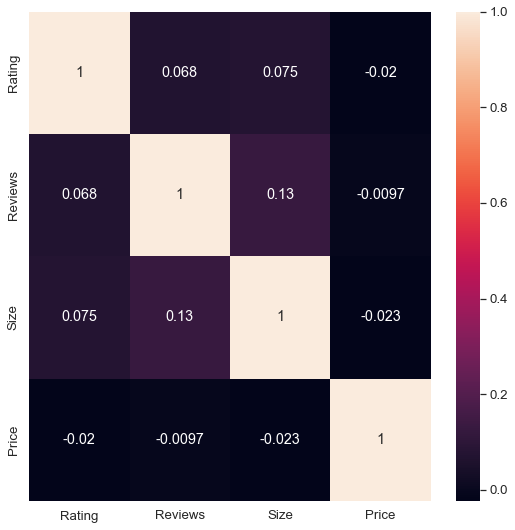

In [118]:
sns.heatmap(df.corr(), annot=True)

**Note:** There is almost no correlation between price and other features.

**11. How many apps for each type of each content rating.**

In [121]:
pd.pivot_table(data = df, index = 'Content Rating', columns = 'Type', values = 'Price', aggfunc='count')

Type,Free,Paid
Content Rating,,
Adults only 18+,3.0,NaN
Everyone,8019.0,695.0
Everyone 10+,381.0,33.0
Mature 17+,479.0,20.0
Teen,1156.0,52.0
Unrated,2.0,NaN


**Note:** We can understand the numbers once u see it.

**12. How many apps that can work on android version 4 or more.**

In [122]:
def android_ver_4(version):
    try:
        if version.startswith('4'):
            return True
        else:
            return False
    except:
        return np.nan
df['is_ver_4'] = df['Android Ver'].apply(android_ver_4)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,4.0.3 and up,True
1,Coloring book moana,Art_And_Design,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,True
3,Sketch - Draw & Paint,Art_And_Design,4.500000,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,4.4 and up,True
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,4.1 and up,True
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,4.1 and up,True
10838,Parkinson Exercices FR,Medical,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,2.2 and up,False
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.500000,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,Varies with device,False


In [125]:
len(df[df['is_ver_4'] == True])

6961

In [126]:
df['is_ver_4'].value_counts()

True     6961
False    3879
Name: is_ver_4, dtype: int64

<AxesSubplot:xlabel='is_ver_4', ylabel='count'>

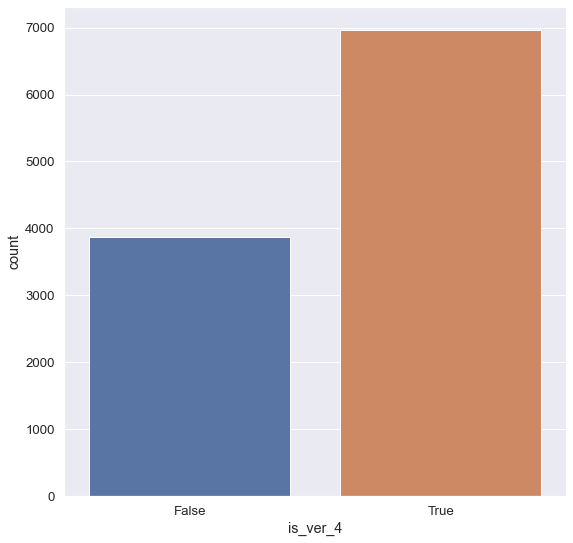

In [127]:
sns.countplot(x = 'is_ver_4', data = df)

**Note:** And that makes good overview on that there is much apps foucing android version 4, and its derivative.